In [1]:
import torch
from torch import nn   # nn contains all of pytorch's bulding blocks for neural networks 
import matplotlib.pyplot as plt


torch.__version__

'1.12.1'

# Machine Learning of Two parts:

1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical represtation.

We'll use linear regression formula to make a straight line with known parameters.

In [2]:
# Create *known*  parameters

weight = 0.7
bias = 0.3

# Create 

start = 0
end = 1
step = 0.02
X = torch.arange(start, end , step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

# Splitting data into training and test sets

Let's create a training and test set with our data.

In [4]:
# Create a train/test split

train_split = int(0.8 * len(X))
print(train_split)

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

40


(40, 40, 10, 10)

### How might we better visulize our data?

This is where the data explorer's motto comes in! 

"Visualize, Visualize, Visualize!"

In [5]:
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test, 
                    predictions = None):

#     plt.figure(figsize=(10, 7))  #diagram image size
    
    # Plot training data in blue 
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")
    
    # Plot test data in green 
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")
    
    # Ara there predicions ?
    if predictions is not None:
        #Plot the prediction if they exist
        plt.scatter(test_data , predictions, c='r', s=4, label="Predictions")
        
    # Show the legend
    plt.legend(prop={"size" : 14});

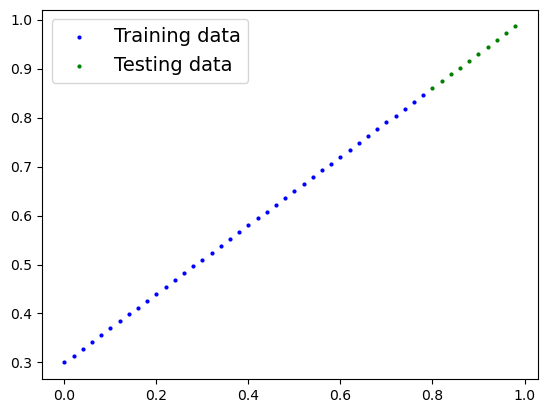

In [6]:
plot_predictions();

# 2. Build model

Our first PyTorch model!

In [7]:
from torch import nn

# create linear regression model class

class LinearRegressionModel(nn.Module):    # almost everyting in PyTorch inherhits from nn.Module
    
    def __init__(self):                                    # You models should subclass this class.
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad = True, # can this parameter be update via gradient descent 
                                                dtype = torch.float)) # pytorch loves the datatype torch.float32
        self.bias = nn.Parameter(torch.randn(1, 
                                            requires_grad = True,
                                            dtype = torch.float))

        #forward method to define the computation in the model 
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # "x" is the input data 
        return self.weights * x + self.bias # this is the liner regression formula
            

In [8]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

## PyTorch model building essentials 

torch.nn - contains all of the building for computation graphs 

torch.nn.Parameter - what parameter should our model try and learn

torch.nn.Module - The base should overwrite forward()

torch.optim - contians various optimization algorithms 

In [9]:
# Creating a random seed 
torch.manual_seed(42)

# Crate an instance of the model(this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters 
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameteres
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Making predicion using torch.inference_mode()

To check our model's predictive power, let's see how well it predicts y_test based on x_test 


In [11]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [12]:
# Make prediction with model 
with torch.inference_mode():   # inference(અનુમાન) mode dislable all other unnecessary things
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [13]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

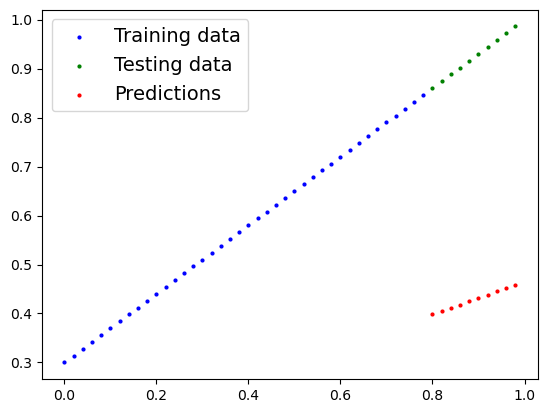

In [14]:
plot_predictions(predictions= y_preds)

# Train model 

* The whole idea of training is for a model to move from some **unknown** parameters(these may be random) to some **known**
  parameters or other words from poor representation of the data to better representation of the data.

* one way to measure how poor or how wrong your models predictions are is to use loss function.

* **Loss function:** A function to measure how wrong your model's predtions are to the ideal output, lower is better.

* Takes into account the loss of a model and adjusts the model's parameters(e.g. weights & bias) to improve the loss function.

And specifically for pytorch, we need:
* A training loop 
* A test loop


In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
# check out our model's parameter ( a parameter is a value that the model set itself) 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
# setup a lost funtion 
loss_fn = nn.L1Loss()

# setup an optimizer (stochastic gredient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)  # lr = learning rate 
 

# Q- Which loss function and optimizer should i use?
* This is problem specific. But with experince we say 

For a regression problem, a loss function of nn.L1Loss() and an optimizer like torch.optim.SGD() 

For classifiction problem(classifiying whather a photo is of dog or cat) loss function of nn.BCLoss() (binary cross entropy loss)

# Building a training (and testing) loop in PyTorch

Things we need in a training loop:

1. Loop through the data
2. Forward pass( this involves data moving through our model)
3. calculate the loss 
4. optimizer zero grad 
5. Loss backward - move backwords through the network to calculate the gradints of each of the parameters 
6. optimizer step - (gradint descent)

In [18]:
# epoch is one loop through the data. (This is hyperperameter beacuse we set it our ourselves)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

## Training 
# 1. loop through the data 
for epoch in range(epochs):
    # set the model to training model
    model_0.train()
    
    # 1. Forward pass
    y_pred = model_0(X_train)
    
    #2. calculate the loss 
    loss = loss_fn(y_pred, y_train)
#     print(f"Loss: {loss}")
    
    #3. opotimizer zero grad
    optimizer.zero_grad()
    
    #4. perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    
    # 5. step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will acculumate throgh th loop so... we have zero them above ub steo=p 3 the next iteration of the loop
    
    
    ### Testig 
    model_0.eval()  # turns off diffrent setting in the model not needed for evaluation/testing (dropout/batch norm layers)
    with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
#     with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. calculate the loss 
        test_loss = loss_fn(test_pred, y_test)
    
    # Print out what's happening 
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch : {epoch} | Loss : {loss} | Test loss: {test_loss}")
        print(model_0.state_dict())  #Print out model state_dict()

Epoch : 0 | Loss : 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch : 10 | Loss : 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch : 20 | Loss : 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch : 30 | Loss : 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch : 40 | Loss : 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch : 50 | Loss : 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch : 60 | Loss : 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', 

In [19]:
import numpy as np 
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

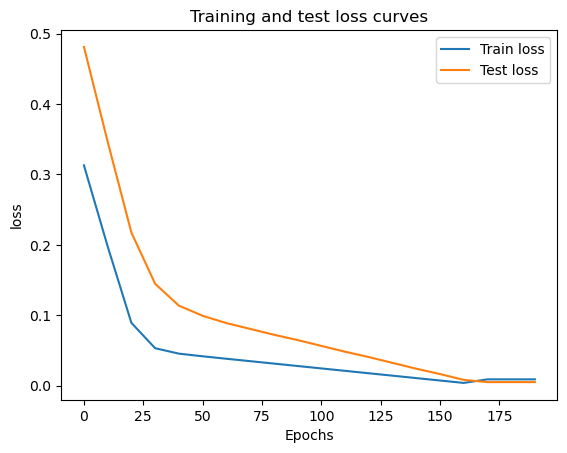

In [20]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend();

In [21]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [23]:
weight, bias 

(0.7, 0.3)

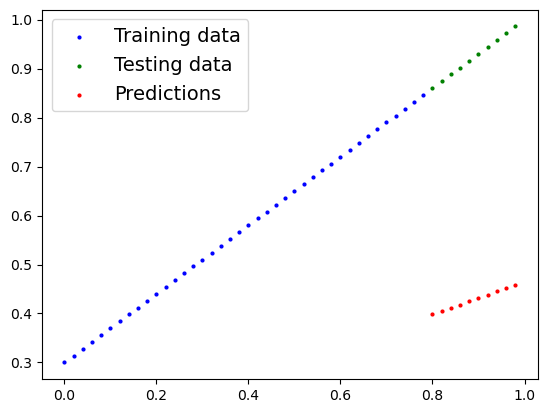

In [24]:
plot_predictions(predictions = y_preds);

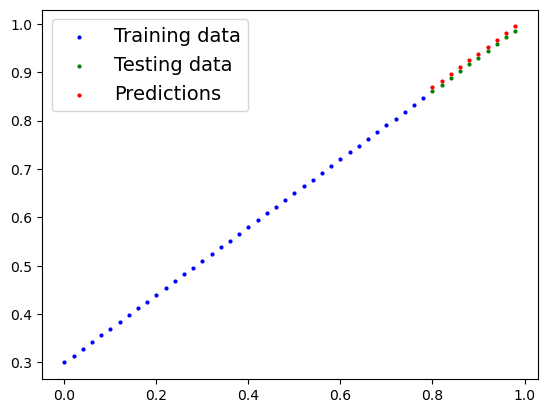

In [25]:
plot_predictions(predictions = y_preds_new);

# Saving a model in PyTorch 

There are three main methods you should about for saving and loading models in PyTorch. 

1. **torch.save()**- allows you a PyTorch object in pytorch's pickle format 

2. **torch.load()** - allows you a saved PyTorch object 

3. **torch.nn.Module.load_state_dict()** - this allows to load a model' s saved state dictionary

In [26]:
# Saving our Pytorch model 
from pathlib import Path 

# 1. Create model directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

#2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), 
          f=MODEL_SAVE_PATH)


Saving model to: models\01_pytorch_workflow_model_0.pth


# Loading PyTorch model


Since we saved our model's **state_dict()** rather the entire model, we'll create a new instance of our model class and load the saved **state_dict()** into that. 

In [27]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [28]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [29]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [30]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [31]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [32]:
# compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all together 

Let's go back through the steps above and see it all in one place.

In [33]:
# Import Pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version 
torch.__version__

'1.12.1'

create device-agnostic code.

This means if we've got access to a GPU, our code will use it(if potentially faster computing).

If not GPU available, the code will default to using CPU.

In [34]:
# Setup device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### 6.1 Data

In [35]:
# Create some data using the linear regression formula of y = weight*X + bias 
weight = 0.7
bias = 0.3

# Create range
start = 0
end = 1
step = 0.02

# create x and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) #without unsqueeze, errors will pop up
y = weight*X + bias 
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [36]:
# Split data 
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

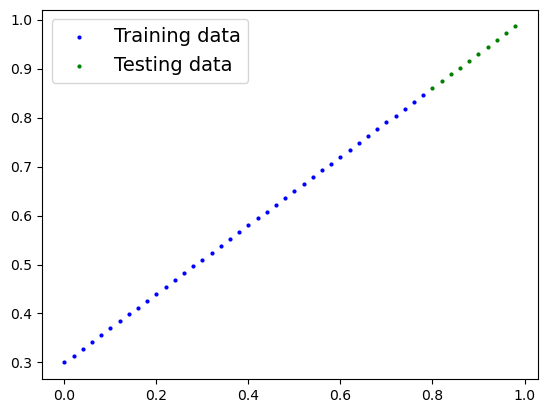

In [37]:
# Plot the data
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear Model

In [38]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters / also called: Linear transforn (y = xA.T + b), dense layer
        self.linear_layer = nn.Linear(in_features = 1, 
                                      out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
        return self.linear_layer(x)

# Set the manual seed 
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [39]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [40]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [41]:
# Check the model current device 
next(model_1.parameters()).device

device(type='cpu')

In [42]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### 6.3 Training 

For training we need:
* Loss function 
* Optimizer 
* Training loop 
* Testing loop 

In [43]:
# Setup loss function 
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer 
optimizer = torch.optim.SGD(params = model_1.parameters(), 
                          lr = 0.01)

In [44]:
# Let's write a traing loop 
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
    model_1.train()
    
    # 1. Forward pass 
    y_pred = model_1(X_train)
    
    # 2. Calculate the loss 
    loss = loss_fn(y_pred, y_train)
    
    #3. Optimizer zero grad 
    optimizer.zero_grad()
    
    #4. Perform backpropagation 
    loss.backward()
    
    #5. Optimizer step 
    optimizer.step()
    
    ### Testing 
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        
        test_loss = loss_fn(test_pred, y_test)
    
    # Print out what's happening 
    if epoch % 10 == 0:
        print(f"Epoch : {epoch} | Loss: {loss} | Test Loss:{test_loss}")
        

Epoch : 0 | Loss: 0.5551779866218567 | Test Loss:0.5739762187004089
Epoch : 10 | Loss: 0.4399680495262146 | Test Loss:0.4392663538455963
Epoch : 20 | Loss: 0.3247582018375397 | Test Loss:0.30455657839775085
Epoch : 30 | Loss: 0.20954827964305878 | Test Loss:0.16984674334526062
Epoch : 40 | Loss: 0.09433844685554504 | Test Loss:0.03513689711689949
Epoch : 50 | Loss: 0.023886386305093765 | Test Loss:0.04784906655550003
Epoch : 60 | Loss: 0.0199567973613739 | Test Loss:0.04580312222242355
Epoch : 70 | Loss: 0.016517987474799156 | Test Loss:0.0375305712223053
Epoch : 80 | Loss: 0.013089170679450035 | Test Loss:0.029944902285933495
Epoch : 90 | Loss: 0.009653178043663502 | Test Loss:0.02167237363755703
Epoch : 100 | Loss: 0.006215679459273815 | Test Loss:0.014086711220443249
Epoch : 110 | Loss: 0.002787243574857712 | Test Loss:0.005814164876937866
Epoch : 120 | Loss: 0.0012645035749301314 | Test Loss:0.013801807537674904
Epoch : 130 | Loss: 0.0012645035749301314 | Test Loss:0.01380180753767

In [45]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [46]:
weight, bias

(0.7, 0.3)

## 6.4 Making and evaluating predictions 

In [47]:
# Turn model into evaluatiion mode 
model_1.eval()

# Make preditions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

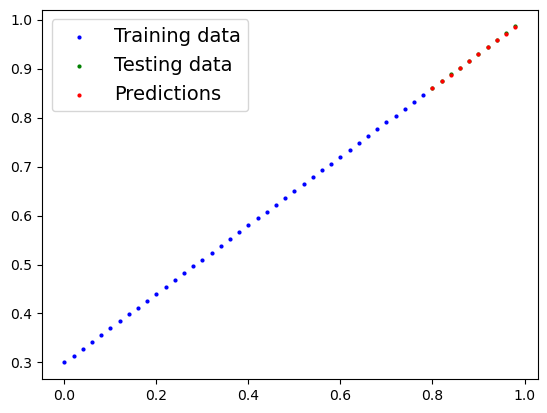

In [49]:
# Check out our model predictions visually 
plot_predictions(predictions = y_preds)

# 6.5 Saving & loading a trained model 

In [52]:
from pathlib import Path

# 1. Create model directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents =True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), 
          f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_1.pth


In [64]:
# Load a PyTorch model 

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
# loaded_model_1.to(device)

<All keys matched successfully>

In [65]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [67]:
# Evaluate loaded model 
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_pred = loaded_model_1(X_test)
y_preds == loaded_model_1_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])